## Max drawdown


A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.

$$ MDD_{max} = \frac{Trough - Peak}{Peak} $$

It is, in essence, the worst possible return you could have obtained, had you bought at the highest and sold at the lowest.

## Wealth index


Graph that shows how a certain amount of money grows within a certain period of time.

If you use drawdowns in the wealth index, you can study how much time it would have required you to recover your potential losses.

## Calmar ratio


Ratio of the annualized return over the trailing 36 motnhs to the maximum drawdown over those trailing 36 months.

## Changing data to time series

In [2]:
import pandas as pd

me_m = pd.read_csv('../Data/data/Portfolios_Formed_on_ME_monthly_EW.csv',
                    header=0, index_col=0, parse_dates=True, na_values=-99.99)

rets = me_m[['Lo 10','Hi 10']]

rets.columns = ['SmallCap','LargeCap']

rets = rets/100 #remember that data was given as a percentage



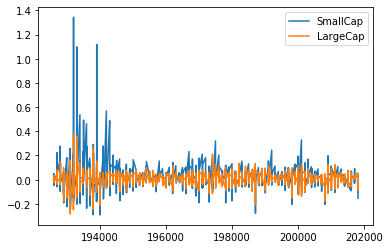

In [3]:
rets.plot()

In [4]:
rets.index = pd.to_datetime(rets.index, format="%Y%m")

#%Y%m% means, year and month: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html#pandas.to_datetime

In [5]:
rets.head()

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


In [6]:
rets.index = rets.index.to_period("M") 

#this simplifies the date up to the month.
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.to_period.html

rets.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


If we format to time series, we can do the following fancy thing:

In [7]:
rets["1975"]

,SmallCap,LargeCap
1975-01,0.3202,0.1286
1975-02,0.0657,0.0613
1975-03,0.0989,0.0414
1975-04,0.0288,0.0531
1975-05,0.0811,0.0610
1975-06,0.0779,0.0524
1975-07,0.0218,-0.0703
1975-08,-0.0525,-0.0177
1975-09,-0.0351,-0.0468
1975-10,-0.0009,0.0620


## Computing drawdowns

# We have to do the following:

1. Compute wealth index
2. Compute previous peaks
3. Compute drawdown, i.e., the wealth value as a percentage of the previous peak.
    
    

In [8]:
#If we start with 1000 dollars:

wealth_index = 1000*(1+rets["LargeCap"]).cumprod()

#We use cumprod because we want the returns in different points, not only at the end.
# https://numpy.org/doc/stable/reference/generated/numpy.cumprod.html

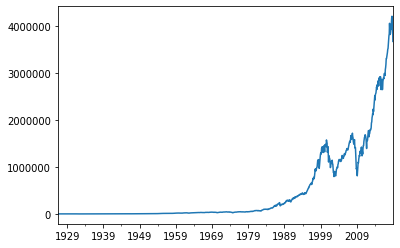

In [9]:
wealth_index.plot()

In [10]:
previous_peaks = wealth_index.cummax()

# Appends a maximum until another bigger is found. Final size is the same as the introduced Series.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cummax.html

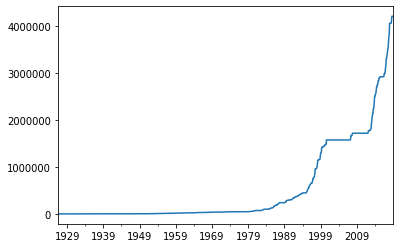

In [11]:
previous_peaks.plot()

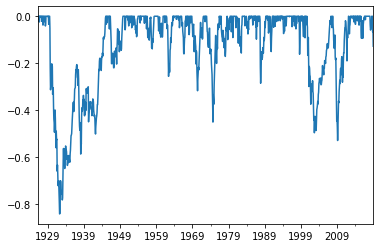

In [12]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()

It is interesting to see that people lost 80% of its wealth in 1929, and it took them nearly 20 years to recover it. However, if we look at a more recent crash, such as the one in 2009, it is clear that the recovery was much quicker.

Let's have a look at some function that we can use.

In [13]:
drawdown.min()

-0.8400375277943123

In [14]:
drawdown["1975"].min()

-0.29336952386205606

In [15]:
drawdown["1975"].idxmin()

Period('1975-01', 'M')

We will now create a function that takes into account everything that we have learnt so far:

In [21]:
def drawdown(return_series: pd.Series):  #if we do it like this, the function will expect a pd.Series
             """
             Takes a time series of asset returns.
             Computes and returns a DataFrame that contains:
             wealth index
             previous peaks
             percent drawdowns
             """
             
             wealth_index = 1000*(1+return_series).cumprod()
             previous_peaks = wealth_index.cummax()
             drawdowns = (wealth_index-previous_peaks)/previous_peaks
             
             return pd.DataFrame({
                 "Wealth": wealth_index,
                 "Peaks": previous_peaks,
                 "Drawdown": drawdowns
             })



Let's try the function.

In [23]:
data = drawdown(rets["LargeCap"])

In [24]:
data.head()

,Wealth,Peaks,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


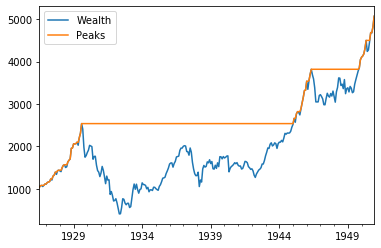

In [28]:
data[:"1950"][["Wealth","Peaks"]].plot() #Plots wealth and peaks data until 1950

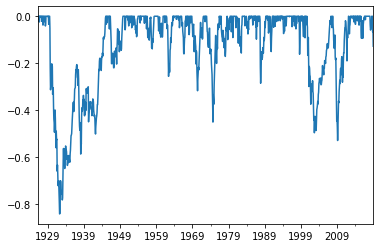

In [29]:
data["Drawdown"].plot()

Let's check the minimum drawdown of both largecap and smallcap

In [30]:
data_2 = drawdown(rets["SmallCap"])


In [32]:
data["Drawdown"].min()



-0.8400375277943123

In [33]:
data["Drawdown"].idxmin()

Period('1932-05', 'M')

In [34]:
data_2["Drawdown"].min()

-0.8330007793945303

In [35]:
data_2["Drawdown"].idxmin()

Period('1932-05', 'M')

So as you can see, the biggest drawdown is the same for both caps.